<a href="https://colab.research.google.com/github/malet-ds/GlobalAIHubDLCourse/blob/main/homeworks/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [3]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 1.4223 - accuracy: 0.6351 - val_loss: 0.3425 - val_accuracy: 0.9088
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9125 - val_loss: 0.2416 - val_accuracy: 0.9265
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.933

### Relu Activation Function

In [4]:
# Write your code here. Use the same architecture as above. 
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(784,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6253 - accuracy: 0.8300 - val_loss: 0.2131 - val_accuracy: 0.9361
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9484 - val_loss: 0.1320 - val_accuracy: 0.9611
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9

### Write your findings about activations here?

1.   Relu activation function worked marginally better than Sigmoid in terms of test accuracy.
2.   In terms of training speed, the first epoch was faster with relu, but all others were identical.
3.   In terms of difference in accuracy between last epoch's validation and test, they are very similar in both cases and not so different from training also.




# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.1229 - accuracy: 0.3699 - val_loss: 1.3927 - val_accuracy: 0.6541
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.2132 - accuracy: 0.6828 - val_loss: 0.8201 - val_accuracy: 0.7519
Test loss: 0.8201035857200623
Test accuracy: 0.7519000172615051
Shape of First Layer (784, 8)
Visual

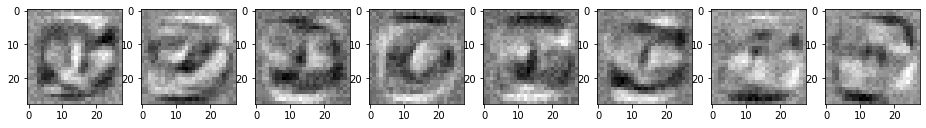

In [8]:
first_layer_size = 8
epochs = 2

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.5137 - accuracy: 0.6598 - val_loss: 0.4346 - val_accuracy: 0.8959
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3813 - accuracy: 0.9021 - val_loss: 0.2759 - val_accuracy: 0.9234
Test loss: 0.27590352296829224
Test accuracy: 0.9233999848365784
Shape of First Layer (784, 64)
Vi

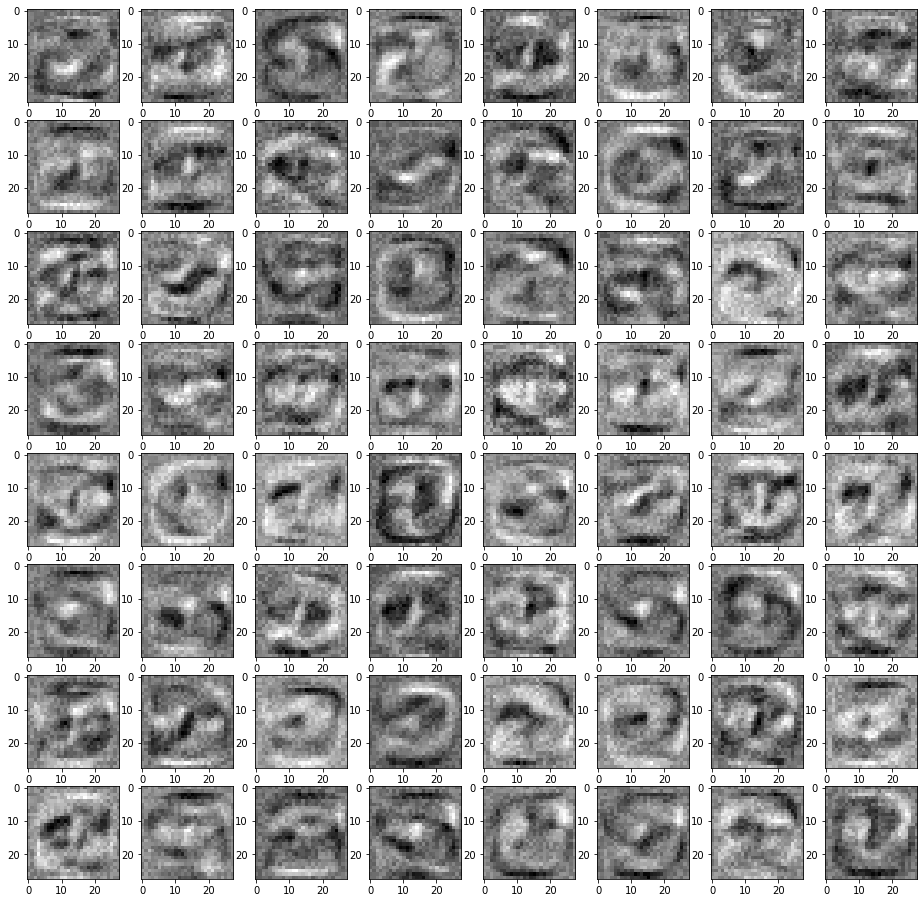

In [9]:
first_layer_size = 64
epochs = 2

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.3487 - accuracy: 0.6915 - val_loss: 0.3527 - val_accuracy: 0.9114
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.9153 - val_loss: 0.2311 - val_accuracy: 0.9348
Test loss: 0.23107561469078064
Test accuracy: 0.9348000288009644
Shape of First Layer (784, 128)

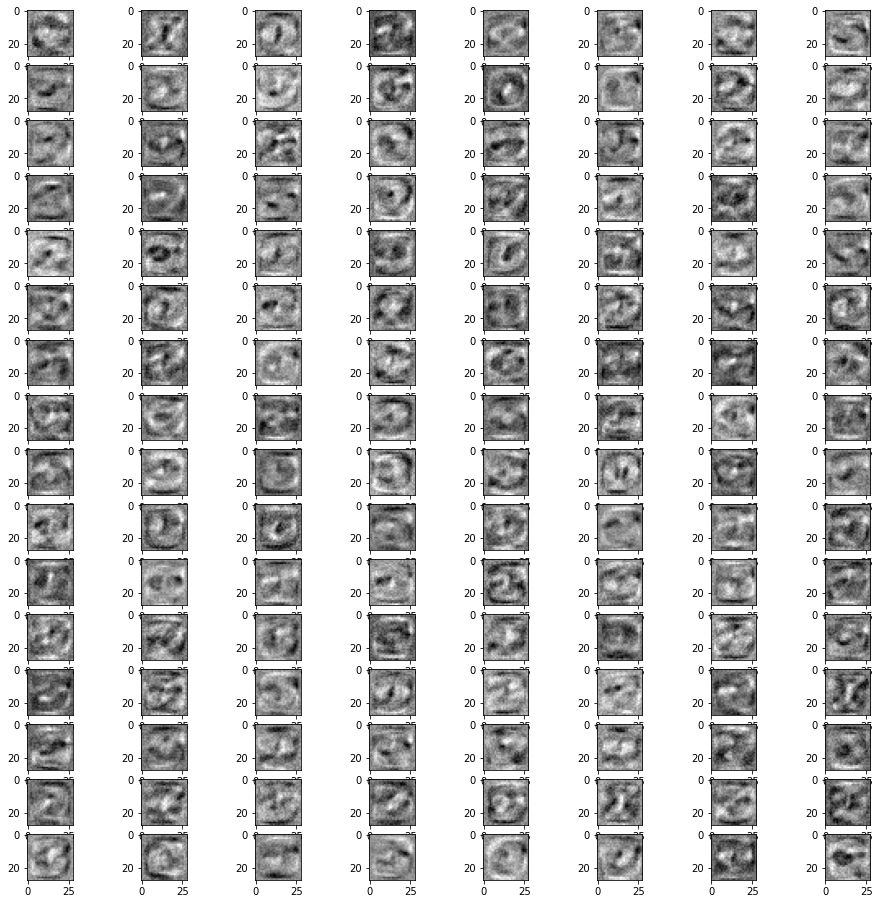

In [10]:
first_layer_size = 128
epochs = 2

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.1899 - accuracy: 0.7486 - val_loss: 0.3112 - val_accuracy: 0.9199
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.2873 - accuracy: 0.9221 - val_loss: 0.2146 - val_accuracy: 0.9374
Test loss: 0.2146340310573578
Test accuracy: 0.9373999834060669
Shape of First Layer (784, 256)


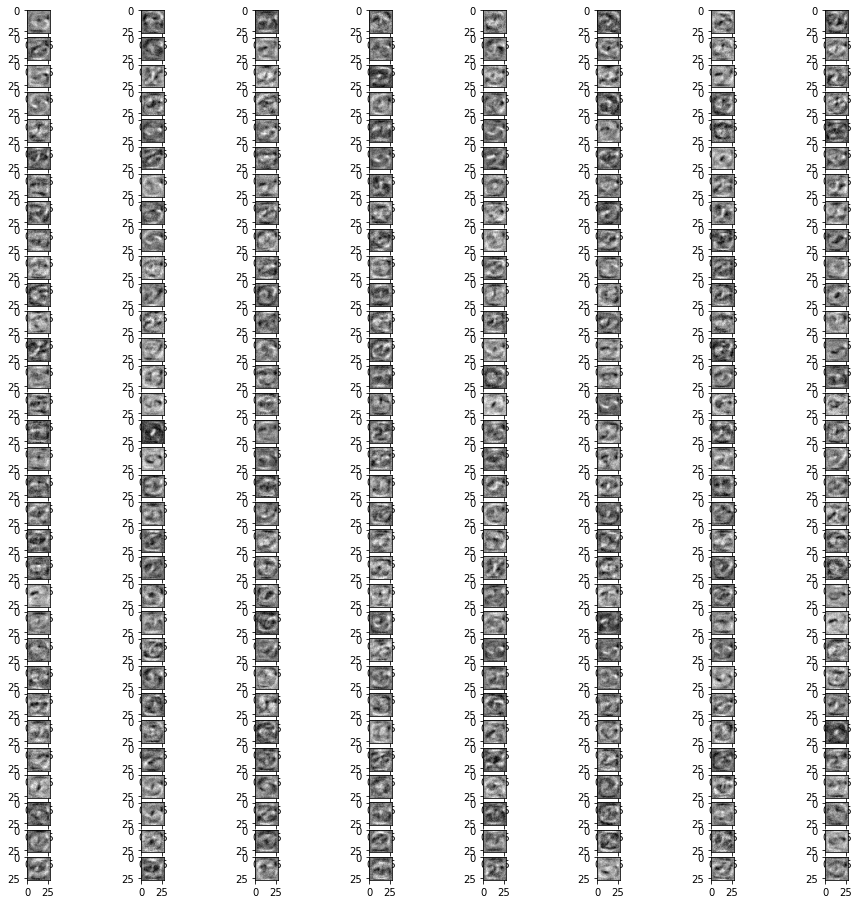

In [11]:
first_layer_size = 256
epochs = 2

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Write your findings about influence of nodes here?

1.   The larger the firs layer, the better the accuracy (keeping everything else constant). However, the change from 8 to 64 is considerably large, from 64 to 128 is very small, and from it to 256 is almost irrelevant.
2.   None of the cases show clear signs of overfitting, giving the accuracy in the validation set in the last epoch and the accuracy in the test set
3.    There are no significant differences in training times (but we trained for only 2 epochs, so this might not be an accurate assesement)




# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7589 - accuracy: 0.8006 - val_loss: 0.2681 - val_accuracy: 0.9217
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.9257 - val_loss: 0.2206 - val_accuracy: 0.9355
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2110 - accuracy: 0.9394 - val_loss: 0.1993 - val_accuracy: 0.9430
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1759 - acc

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8984 - accuracy: 0.7269 - val_loss: 0.2

In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7384 - accuracy: 0.8010 - val_loss: 0.2536 - val_accuracy: 0.9280
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.9326 - val_loss: 0.1911 - val_accuracy: 0.9459
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.

### Write your findings about influence of layers here?

1.   Test accuracy with one layer is 0.962, with two layers is 0.963 and with four layers is 0.967. Number of layers does increse accuracy, but not as much as the effect found when changing the number of units in the first layer.
2.    While there is no significant difference in speed between models with one or two layers, the model with four layers took almost twice as much to train than the other two. We are only training for 10 epochs on 60K training samples, on much larger datasets and/or much more epochs, this difference might be relevant enogh to question if it's really worth the 0.004 increase in accuracy.